In [2]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 

from pprint import pprint 
import seaborn as sns 
from matplotlib import collections 
%matplotlib inline 

## Define Function

In [19]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x=x[:, np.newaxis]
y = y[:, np.newaxis]

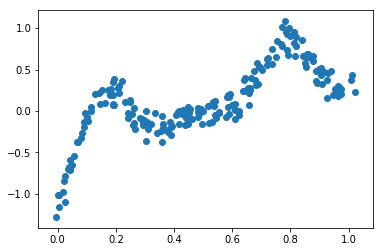

In [20]:
plt.scatter(x, y)

In [21]:
inp  = np.c_[x,y]

## PCA on the function

### PCA projected value plot

[[-0.51201306 -0.85897767]]


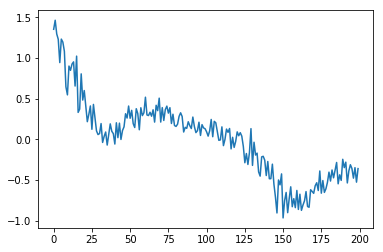

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(inp)
# the values of the hidden representation of all data
plt.plot(principalComponents)
print(pca.components_)

### PCA line plot, where all data project to

[[-0.51201306 -0.85897767]]


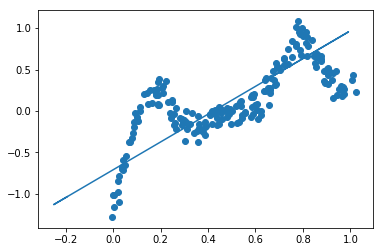

In [23]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(inp)
# plt.plot(principalComponents)
xy_n=pca.inverse_transform(principalComponents)

plt.scatter(x, y)
x_n = xy_n[:, 0]
y_n = xy_n[:, 1]
plt.plot(x_n, y_n)
# plt.plot(xy_n[:, 0], xy_n[:,1])
print(pca.components_)

### Finding PCA line from the learned variables

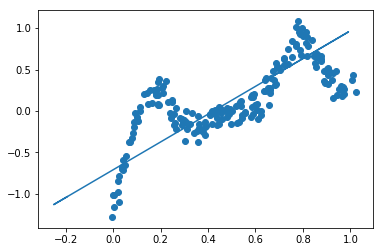

In [24]:
plt.scatter(x, y)
data_reduced = np.dot(inp - pca.mean_, pca.components_.T)
data_original = np.dot(data_reduced, pca.components_) + pca.mean_
plt.plot(data_original[:,0], data_original[:,1])

## Testing relationship between Components Learnt and Line It represents/reconstructs

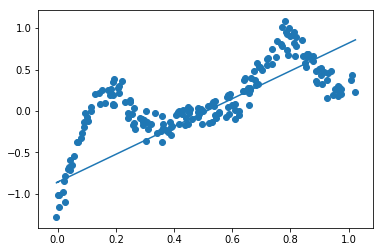

In [26]:
# test purpose, not sure it works (Seems like it doesnt work)
plt.scatter(x, y)
a = pca.components_[0][0]
b = pca.components_[0][1]
m = b/a
plt.plot(x, x*m + b )

### Equivalent to slope of line represented

In [27]:
# m0 = (xy_n[0, 1] - xy_n[-1, 1]) / (xy_n[0,0] - xy_n[-1,0])
m0 = (y_n[0] - y_n[-1]) / (x_n[0] - x_n[-1])
print(m0)
m1 = b/a
print(m1)

1.677647974033718
1.6776479740337178


### Equivalent to bias/intercept of the line represented

In [28]:
b0 = y_n[-1] - m0*x_n[-1]
# b0 = pca.mean_[1] - m1*pca.mean_[0]
print(b0)
b1 = pca.mean_[1] - m1*pca.mean_[0]
print(b1)

-0.7100549702549767
-0.7100549702549767


### projection into the PCA line plot

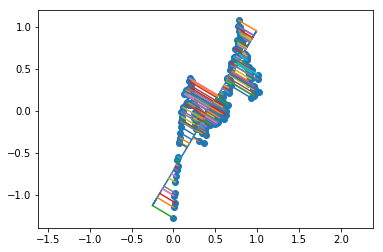

In [40]:
plt.axis('equal')
plt.scatter(x, y)
plt.plot(xy_n[:, 0], xy_n[:,1])
for xx, yy, xxPred, yyPred in zip(x, y, xy_n[:, 0], xy_n[:,1]):
    plt.plot([xx,xxPred], [yy, yyPred])
plt.show()

### Autoencoder using pyTorch

In [42]:
import torch
import torch.nn.functional as F

In [43]:
X = torch.from_numpy(inp).type(torch.float32)
# print( X.mean(dim=0, keepdim=True))
# print(X)
Xnorm = X - X.mean(dim=0)
# Xx = torch.cat((X, torch.ones(X.shape[0], 1)), dim=1)

W = torch.empty(2,1, requires_grad=True)
# W = torch.empty(3,1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
# b_ = torch.zeros(1, requires_grad=True)

torch.nn.init.uniform_(W)

alpha = 0.01
optimizer = torch.optim.SGD(params=[W], lr=alpha)

In [44]:
for i in range(10000):
    h = Xnorm.mm(W)
#     h = X.mm(W)
#     h = Xx.mm(W)
#     W_ = torch.from_numpy(np.linalg.pinv(W.data.numpy()))
    W_ = W.t()
    X_ = h.mm(W_)
    
    
#     h = Xnorm.mm(W.t())
#     X_ = h.mm(W)
    
    optimizer.zero_grad()
    loss = F.mse_loss(X_, Xnorm)
    loss.backward()
    optimizer.step()
    
    if i%1000 == 0:
        print('loss = ',loss)

loss =  tensor(0.0970, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
loss =  tensor(0.0149, grad_fn=<MseLossBackward>)


In [45]:
W

tensor([[0.5120],
        [0.8590]], requires_grad=True)

### Plot of the hidden value given X

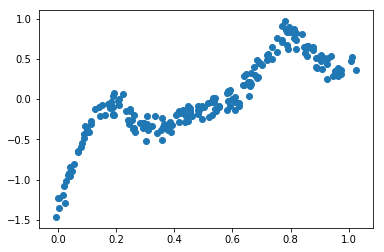

In [46]:
plt.scatter(x, h.data.numpy())

### Plot of the hidden value given Y

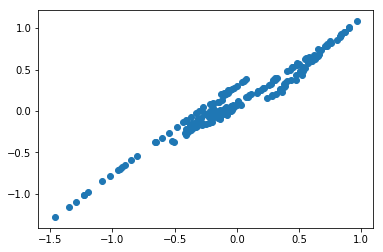

In [47]:
plt.scatter(h.data.numpy(), y)

### find equivalent variables from AE to PCA

In [49]:
m0

1.677647974033718

In [50]:
WW = W[1]/W[0]
WW

tensor([1.6777], grad_fn=<DivBackward0>)

In [51]:
b0

-0.7100549702549767

In [52]:
bb = X.mean(dim=0)[1] - m1*X.mean(dim=0)[0]
bb

tensor(-0.7101)

### Plot the line extracted from AE

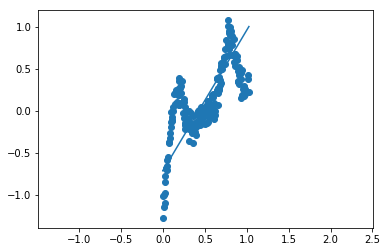

In [62]:
yy=WW.data.numpy()*x + bb.data.numpy()
# gives the same line (yesss) but, yy is not the reconstructed points (nooo)
plt.axis('equal')
plt.scatter(x,y)
plt.plot(x,yy)

#### Line extracted from PCA

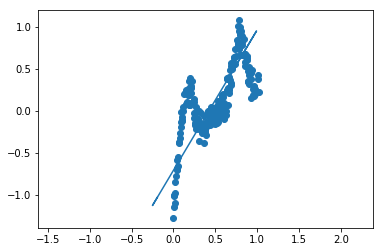

In [63]:
plt.axis('equal')
plt.scatter(x, y)
plt.plot(x_n, y_n)

#### Plot the line extracted from AE

components tensor([[0.2621, 0.4398],
        [0.4398, 0.7379]], grad_fn=<MmBackward>)


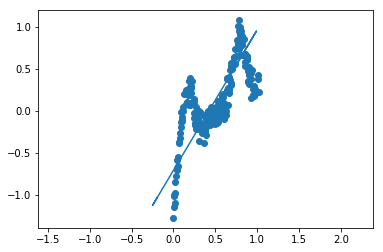

In [64]:
xx = h.mm(W_)
xxx = xx + X.mean(dim=0)
plt.axis('equal')
plt.scatter(x,y)
plt.plot(xxx.data.numpy()[:,0],xxx.data.numpy()[:,1] )
print('components', W.mm(W.t()))